In [1]:
import pandas as pd
import seaborn as sns

In [2]:
implied_adj = pd.read_clipboard()

implied_adj.tail()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
adj = pd.read_clipboard()
adj = adj.reset_index(drop=True)

adj.tail()

,index,variable,value
2005,3,103,1
2006,4,103,1
2011,9,103,1
2019,17,103,1
2023,21,103,1


<AxesSubplot: >

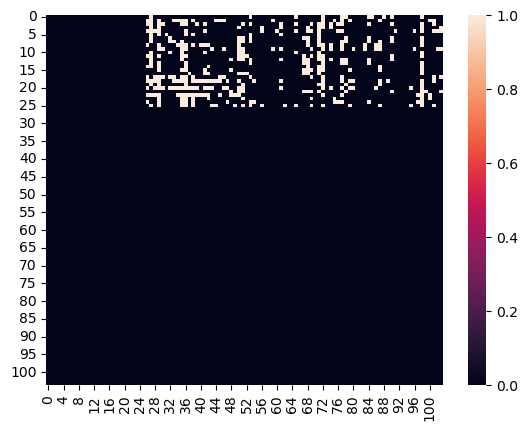

In [3]:
sns.heatmap(implied_adj)

In [20]:

expanded_implied_matrix = implied_adj.copy()
for i, row in adj.iterrows():
    expanded_implied_matrix.loc[row["index"], str(row["variable"])] = 1
    expanded_implied_matrix.loc[row["variable"], str(row["index"])] = 1

<AxesSubplot: >

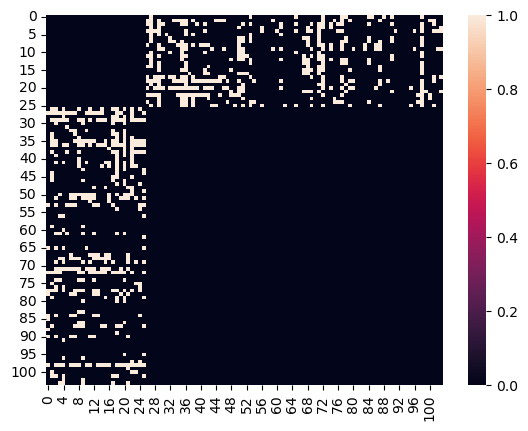

In [21]:
sns.heatmap(expanded_implied_matrix)

In [32]:
new_adj = adj.copy()
for i, row in adj.iterrows():
    row_to_add = pd.DataFrame([{"index": row["variable"], "variable": str(row["index"]), "value": 1}])
    new_adj = pd.concat([new_adj, row_to_add], axis=0)

In [33]:
new_adj

,index,variable,value
0,1,26,1
1,2,26,1
2,4,26,1
3,8,26,1
4,11,26,1
...,...,...,...
0,103,3,1
0,103,4,1
0,103,9,1
0,103,17,1


In [36]:
import torch
from torch_geometric.utils import to_dense_adj
import numpy as np

row = torch.from_numpy(new_adj["index"].to_numpy().astype(np.int64)).to(torch.long)
col = torch.from_numpy(new_adj["variable"].to_numpy().astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

In [44]:
new_expanded_implied_matrix = pd.DataFrame(to_dense_adj(edge_index)[0])

<AxesSubplot: >

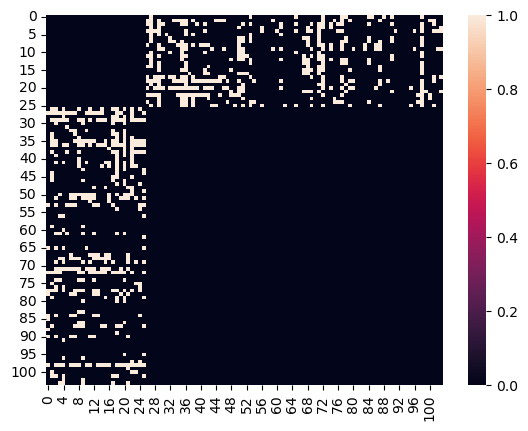

In [45]:
sns.heatmap(new_expanded_implied_matrix)